# Predicting No-shows at Medical Appointments

## By : Brandon Ian Miranda
* Email: brandoniandigital@gmail.com
* GitHub: sapphireten
* Date: November 21st, 2021
* Thank you. 

## Introduction to dataset
The dataset used for this notebook comes from the Kaggle Predicting No-shows at Medical Appointments. The data was taken to see if there was any kind of correlation with a patient missing a doctor's appointment based off of their demographic information and individual health issues. 

## Random Forest Classifier
Below the machine learning algorithm that I'll be using will be a RandomForestClassifer to mainly find the accuracy of the model with the selected features and see how they influence the show or no-show of a patient, and to find which features according to the model, show to be more important.

In [1]:
# loading in packages that we'll need
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import SelectFromModel

In [2]:
# loading in kaggle no-show doctor appointment data

dataset = pd.read_csv("KaggleV2-May-2016.csv")

In [3]:
# showing dataset 

dataset.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# splitting the data set
# Before choosing the features we have to convert the categorical and string data in our data set into numerical

# Gender
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
gender_encoded = le.fit_transform(dataset['Gender'])
print(gender_encoded)
dataset['encoded_gender'] = gender_encoded

# Scheduled Day
schedule_encoded = le.fit_transform(dataset['ScheduledDay'])
print(schedule_encoded)
dataset['encoded_ScheduleDay'] = schedule_encoded

# Appointment Day
appointment_encoded = le.fit_transform(dataset['AppointmentDay'])
print(appointment_encoded)
dataset['encoded_AppointmentDay'] = appointment_encoded


# Only choosing some features that can be considered highly influential for the split
X = dataset[['encoded_gender','encoded_ScheduleDay','encoded_AppointmentDay','Age','Hipertension','Diabetes','SMS_received']]
y = dataset[['No-show']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

[0 1 0 ... 0 0 0]
[27741 27503 27538 ... 21536 21399 21019]
[ 0  0  0 ... 25 25 25]


In [5]:
# setting up RandomForest Model 
# Creating a Gaussian CLassifier
snow = RandomForestClassifier(n_estimators=100)

# Now I begin to train the model using the training sets from the split. 
snow.fit(X_train,y_train.values.ravel())

pred_y = snow.predict(X_test)

In [6]:
# Time to show the accuracy 
from sklearn import metrics
print("Accuracy of the model is ",metrics.accuracy_score(y_test,pred_y))

Accuracy of the model is  0.775475738110317


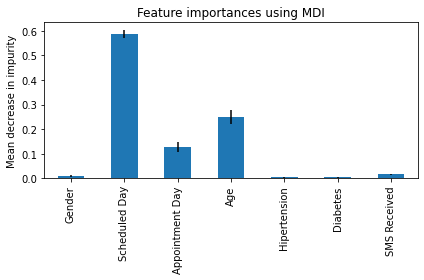

In [15]:
# Now for some visualizations. First feature importance using matplotlib
# based on MDI Mean Decrease Impurity 
import time
import matplotlib.pyplot as plt
start_time = time.time()
importances = snow.feature_importances_
std = np.std([tree.feature_importances_ for tree in snow.estimators_], axis=0)
elapsed_time = time.time() - start_time

feature_names = [f"feature{i}" for i in range(X.shape[1])]


snow_importances = pd.Series(importances, index = feature_names)

fig, ax = plt.subplots()
snow_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
ax.set_xticklabels(('Gender','Scheduled Day','Appointment Day', 'Age', 'Hipertension', 'Diabetes','SMS Received'))

fig.tight_layout()

In [11]:
# feature importance based on feature permutation

from sklearn.inspection import permutation_importance 

result = permutation_importance(
    snow, X_test, y_test, n_repeats = 10, random_state= 42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed Time to compute the importances: {elapsed_time:.3f} seconds")

snow_importances = pd.Series(result.importances_mean, index = feature_names)

Elapsed Time to compute the importances: 8718.533 seconds


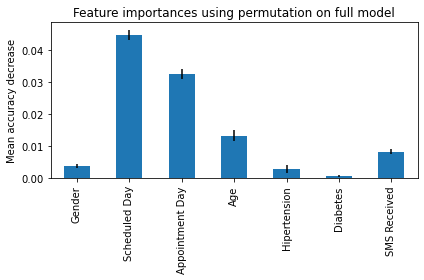

In [14]:
# Visualization

fig, ax = plt.subplots()
snow_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
#ax.set_xticks(a)
ax.set_xticklabels(('Gender','Scheduled Day','Appointment Day', 'Age', 'Hipertension', 'Diabetes','SMS Received'))
fig.tight_layout()
plt.show()

## Conclusion
In the end the model turned out to be about 77% to 78% accurate with the selected features. This of course could of been improved if there were less features selected but for the sake of using the features that made the most sense, the feature count was kept the same. Also hypertuning the parameters could have also helped the cause but for the sake of a simple model which in this case I mainly chose to focus on the visualizations, this method was also not taken into account. In conclusion, based off of the two visuals, one using MDI and the other permutation, the results were similar. Using MDI, "Scheduled Day" and "Age" were proven to be the most important features with "Appointment Day" coming in close. Using the permutation method, "Scheduled Day and "Appointment Day" came in as the most important features with "Age" being third. In both methods, "Scheduled Day" was the most important feature with the 2nd and 3rd most important features being swapped in the two. It is worth mentioning that permutation method gave a more substantial result as a 4th feature worth noting "SMS-Recevied" was shown as "semi-important".  